# 공이 직선운동하는 동영상 만들기 (1초 분량, FPS=25)


In [1]:
import cv2
import numpy as np

# 동영상 파일명, 코덱, 프레임 속도, 프레임 크기
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('straight_line_motion.mov', fourcc, 25.0, (640, 480))

# 초기 위치, 속도
position = np.array([20, 250], dtype=int)
velocity = np.array([20, 0], dtype=int)

# 동영상 길이 1초(25프레임)
num_frames = 25

# 동영상 생성 및 프레임 추가
for i in range(num_frames):
    # 잔디밭색 배경 생성
    frame = np.zeros((480, 640,3), dtype=np.uint8)
    frame[:]=(0,153,0) 

    # 그릴 곳, 원중심점, 반지름, 색깔, 두께, 라인종류
    cv2.circle(frame, position,10,(255,255,255),cv2.FILLED, cv2.LINE_8)

    # 프레임을 비디오에 추가
    out.write(frame)

    # 공의 위치 업데이트
    position += velocity
    
    cv2.imshow('video',frame)
    if cv2.waitKey(1)==ord('q'):
        break
        
out.release() #자원 해제         
cv2.destroyAllWindows()

In [13]:
import math

def ball_trajectory(start_pos, end_pos, length, height):
    x0, y0 = start_pos
    x1, y1 = end_pos
    
    # Calculate coefficients of quadratic equation
    a = -(4 * height) / ((x1 - x0) ** 2)
    b = (4 * height * x0) / (x1 - x0)
    c = y0
    
    trajectory = {}
    for i in range(length):
        # Calculate x position
        x = x0 + (i * (x1 - x0) / (length - 1))
        
        # Calculate y position using quadratic equation
        y = a * (x - x0) ** 2 + b * (x - x0) + c
        
        # Add position to trajectory dictionary
        trajectory[i] = [x, y]
        
    return trajectory


# 공이 포물선운동하는 동영상 만들기 (2초 분량, FPS=25)

In [11]:
import cv2
import numpy as np

# 동영상 파일명, 코덱, 프레임 속도, 프레임 크기
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('parabolic_ball_motion.mov', fourcc, 25.0, (640, 480))

# 초기 위치 설정
#x0, y0 = 10, 480

start_pos = [0, 0]
end_pos = [400, 0]
length = 11
height = 200

trajectory = ball_trajectory(start_pos, end_pos, length, height)

print(trajectory)


# 포물선의 방정식에 사용할 변수와 초기값 설정
g = 9.8 * 5 # 중력 가속도 (m/s^2)
v0 = 85  * 5  # 초기 속도 (m/s)
theta = np.deg2rad(60)  # 발사 각도 (60도를 라디안으로 변환)
dt = 0.01  # 시간 간격
t = 0  # 초기 시간

# 이전 위치들을 저장할 리스트
prev_positions = []

# 동영상 길이를 2초(50프레임)
num_frames = 50

# 동영상 생성 및 프레임 추가
for i in range(num_frames):
#    while True:
        # x, y 좌표 계산
        x = int(x0 + v0 * np.cos(theta) * t)
        y = int(y0 - v0 * np.sin(theta) * t + 0.5 * g * t**2)
        
        # 이전 위치들을 리스트에 추가
        prev_positions.append((x, y))
        
        # 잔디밭색 배경 생성
        frame = np.zeros((480, 640,3), dtype=np.uint8)
        frame[:]=(0,153,0) 

        # 그릴 곳, 원중심점, 반지름, 색깔, 두께, 라인종류
        cv2.circle(frame,(x,y),5,(255,255,255),cv2.FILLED,cv2.LINE_8)
        
        for i in range(len(prev_positions)-1):
            cv2.line(frame, prev_positions[i], prev_positions[i+1], (0, 0, 255), 1)  # 이전 위치들을 선으로 연결하여 경로 그리기

        # 프레임을 비디오에 추가
        out.write(frame)

        cv2.imshow('video',frame)
        if cv2.waitKey(1)==ord('q'):
            break
        t += dt  # 시간 갱신

# 파일과 리소스 해제
out.release()
cv2.destroyAllWindows()


{0: [0.0, 0.0], 1: [40.0, -8.0], 2: [80.0, -32.0], 3: [120.0, -72.0], 4: [160.0, -128.0], 5: [200.0, -200.0], 6: [240.0, -288.0], 7: [280.0, -392.0], 8: [320.0, -512.0], 9: [360.0, -648.0], 10: [400.0, -800.0]}


In [6]:
#2초에서 끝


import cv2
import numpy as np

# 동영상 파일명, 코덱, 프레임 속도, 프레임 크기
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('parabolic_ball_motion.mov', fourcc, 25.0, (640, 480))

# 초기 위치 설정
x0, y0 = 10, 480

# 포물선의 방정식에 사용할 변수와 초기값 설정
g = 9.8 * 10 # 중력 가속도 (m/s^2)
v0 = 85 * 10 # 초기 속도 (m/s)
theta = np.deg2rad(60)  # 발사 각도 (60도를 라디안으로 변환)
dt = 0.01  # 시간 간격
t = 0  # 초기 시간

# 이전 위치들을 저장할 리스트
prev_positions = []

# 동영상 길이를 2초(50프레임)
num_frames = 50

# 동영상 생성 및 프레임 추가
for i in range(num_frames):
    # x, y 좌표 계산
    x = int(x0 + v0 * np.cos(theta) * t)
    y = int(y0 - v0 * np.sin(theta) * t + 0.5 * g * t**2)
        
    # 이전 위치들을 리스트에 추가
    prev_positions.append((x, y))
        
    # 잔디밭색 배경 생성
    frame = np.zeros((480, 640,3), dtype=np.uint8)
    frame[:]=(0,153,0) 

    # 그릴 곳, 원중심점, 반지름, 색깔, 두께, 라인종류
    cv2.circle(frame,(x,y),5,(255,255,255),cv2.FILLED,cv2.LINE_8)
        
    for i in range(len(prev_positions)-1):
        cv2.line(frame, prev_positions[i], prev_positions[i+1], (0, 0, 255), 1)  # 이전 위치들을 선으로 연결하여 경로 그리기

    # 프레임을 비디오에 추가
    out.write(frame)

    cv2.imshow('video',frame)
    if cv2.waitKey(1)==ord('q'):
        break
        
    t += dt  # 시간 갱신

out.release()
cv2.destroyAllWindows()


In [2]:
import math

def ball_trajectory(start_pos, highest_pos, length):
    x0, y0 = start_pos
    x2, y2 = highest_pos
    
    # Calculate coefficients of quadratic equation
    a = -(y2 - y0) / ((x2 - x0) ** 2)
    b = 2 * a * x0
    c = y0
    
    trajectory = {}
    for i in range(length):
        # Calculate x position
        x = x0 + (i * (x2 - x0) / (length - 1))
        
        # Calculate y position using quadratic equation
        y = a * (x - x0) ** 2 + b * (x - x0) + c
        
        # Add position to trajectory dictionary
        trajectory[i] = [x, y]
        
    return trajectory


In [3]:
start_pos = [10, 480]
end_pos = [400, 480]
length = 11
height = -30

trajectory = ball_trajectory(start_pos, end_pos, length, height)

print(trajectory)

{0: [10.0, 480.0], 1: [49.0, 361.2], 2: [88.0, 244.8], 3: [127.0, 130.8], 4: [166.0, 19.19999999999999], 5: [205.0, -90.0], 6: [244.0, -196.79999999999995], 7: [283.0, -301.20000000000005], 8: [322.0, -403.20000000000005], 9: [361.0, -502.79999999999995], 10: [400.0, -600.0]}


In [3]:
import cv2
import numpy as np

# Define video properties
width, height = 640, 480
fps = 25
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter('ball_trajectory.mp4', fourcc, fps, (width, height))

# Define colors
green = (0, 255, 0)
white = (255, 255, 255)

# Generate trajectory
start_pos = [100, 400]
highest_pos = [400, 100]
length = 200
trajectory = ball_trajectory(start_pos, highest_pos, length)

# Draw trajectory on each frame
for i in range(length):
    # Create empty frame with green background
    frame = np.zeros((height, width, 3), dtype=np.uint8)
    frame[:] = green
    
    # Draw white ball on current position
    x, y = trajectory[i]
    center = (int(x), int(y))
    radius = 10
    cv2.circle(frame, center, radius, white, -1)
    
    # Write frame to video
    video_writer.write(frame)
    
    cv2.imshow('video',frame)
    if cv2.waitKey(1)==ord('q'):
        break
        
# Release video writer
video_writer.release()


In [1]:
import cv2
import numpy as np

# 동영상 파일명, 코덱, 프레임 속도, 프레임 크기
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('parabolic_motion.mov', fourcc, 25.0, (640, 480))

# 초기 위치 속도
position = np.array([10, 480], dtype=int)
velocity = np.array([10, -1], dtype=int)  # x축으로는 움직이지 않고 y축으로는 위로 움직입니다.
acceleration = np.array([0, -1], dtype=int)  # 중력 가속도



# 동영상 길이를 2초(50프레임)
num_frames = 50

# 동영상 생성 및 프레임 추가
for i in range(num_frames):
    # 잔디밭색 배경 생성
    frame = np.zeros((480, 640,3), dtype=np.uint8)
    frame[:]=(0,153,0) 

    # 그릴 곳, 원중심점, 반지름, 색깔, 두께, 라인종류
    cv2.circle(frame, position,10,(255,255,255),cv2.FILLED, cv2.LINE_8)

    # 프레임을 비디오에 추가
    out.write(frame)

    # 공의 위치, 속도, 가속도 업데이트
#    while(position)
    position += velocity
    velocity += acceleration
    
    print(position)
    
    cv2.imshow('video',frame)
    if cv2.waitKey(1)==ord('q'):
        break

# 파일과 리소스 해제
out.release()
cv2.destroyAllWindows()


[ 20 479]
[ 30 477]
[ 40 474]
[ 50 470]
[ 60 465]
[ 70 459]
[ 80 452]
[ 90 444]
[100 435]
[110 425]
[120 414]
[130 402]
[140 389]
[150 375]
[160 360]
[170 344]
[180 327]
[190 309]
[200 290]
[210 270]
[220 249]
[230 227]
[240 204]
[250 180]
[260 155]
[270 129]
[280 102]
[290  74]
[300  45]
[310  15]
[320 -16]
[330 -48]
[340 -81]
[ 350 -115]
[ 360 -150]
[ 370 -186]
[ 380 -223]
[ 390 -261]
[ 400 -300]
[ 410 -340]
[ 420 -381]
[ 430 -423]
[ 440 -466]
[ 450 -510]
[ 460 -555]
[ 470 -601]
[ 480 -648]
[ 490 -696]
[ 500 -745]
[ 510 -795]


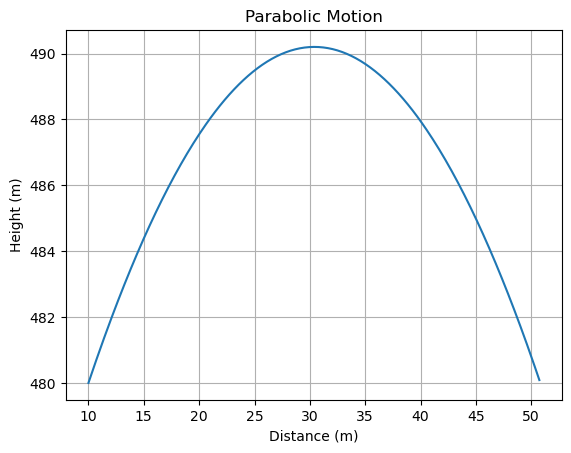

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 포물선의 방정식에 사용할 변수와 초기값 설정
g = 9.8  # 중력 가속도 (m/s^2)
v0 = 20  # 초기 속도 (m/s)
theta = np.deg2rad(45)  # 발사 각도 (45도를 라디안으로 변환)
t_total = 2 * v0 * np.sin(theta) / g  # 전체 시간
dt = 0.01  # 시간 간격
t = np.arange(0, t_total, dt)  # 시간 배열 생성

# 초기 위치 설정
x0, y0 = 10, 480

# x, y 좌표 계산
x = x0 + v0 * np.cos(theta) * t
y = y0 + v0 * np.sin(theta) * t - 0.5 * g * t**2

# 그래프 그리기
plt.plot(x, y)
plt.title('Parabolic Motion')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.grid(True)
plt.show()

In [ ]:
#동영상 저장
cap = cv2.VideoCapture('video.mp4')

#코덱 정의
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

#속도 fps, 프레임크기
fps = cap.get(cv2.CAP_PROP_FPS) # 속도 fps
width = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height= round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#저장 파일명, 코덱, fps, 크기
out = cv2.VideoWriter('output.avi',fourcc,fps,(width,height))

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret : 
        break
    out.write(frame) #영상데이터만 저장 소리x    
    cv2.imshow('video',frame)
    if cv2.waitKey(1)==ord('q'):
        break
out.release() #자원 해제         
cap.release()
cv2.destroyAllWindows()

In [ ]:
#원
import cv2
import numpy as np

img = np.zeros((480,640,3), dtype = np.uint8) #0으로 가득찬 , 검정색처럼 보임
img[:] = (0,153,0) #잔디밭색

color = (255,255,255)
thickness = 3
radius = 10 #반지름

#그릴 곳, 원중심점, 반지름, 색깔, 두께, 라인종류
cv2.circle(img, (50,50), radius, color, thickness, cv2.LINE_4)
cv2.circle(img, (50,150), radius, color, cv2.FILLED, cv2.LINE_8) # cv2.FILLED 속 채우기

cv2.imshow('img',img) 
cv2.waitKey(0)
cv2.destroyAllWindows()